In [1]:
# Data manipulation
import numpy as np
import pandas as pd
import re

# Ignore warnings
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# Data visualization
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Style
import matplotlib.style as style
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
sns.set(style="whitegrid")
sns.set_style("dark")

In [2]:
movies = pd.read_csv('D:/CS550Project/SmallData/movies.csv')
ratings = pd.read_csv('D:/CS550Project/SmallData/ratings.csv')
tags = pd.read_csv('D:/CS550Project/SmallData/tags.csv')

In [9]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


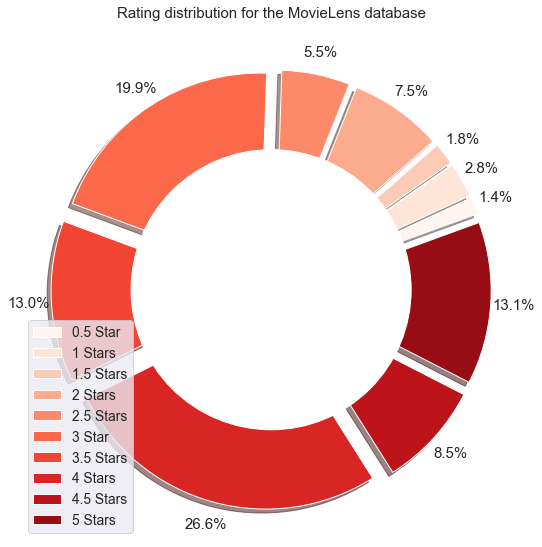

In [15]:
rating = ratings.merge(movies, on='movieId', how='inner')
rating.drop('timestamp', axis=1, inplace=True)
rating.head()
grouped = pd.DataFrame(rating.groupby(['rating'])['title'].count())
grouped.rename(columns={'title':'rating_count'}, inplace=True)


fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(122)

# Create colour palette
label = ['0.5 Star', '1 Stars', '1.5 Stars', '2 Stars', '2.5 Stars', '3 Star', '3.5 Stars', '4 Stars', '4.5 Stars', '5 Stars']
theme = plt.get_cmap('Reds')
ax.set_prop_cycle("color", [theme(1. * i / len(label))
                                 for i in range(len(label))])
sns.set(font_scale=1.25)

# Create pie chart
pie = ax.pie(grouped['rating_count'],
                 autopct='%1.1f%%',
                 shadow=True,
                 startangle=20,
                 pctdistance=1.115,
                 explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))

# Turn pie chart into a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Display donut plot with legend
plt.legend(pie[0], label, loc="lower left")
ax.set_title('Rating distribution for the MovieLens database\n', fontsize=15)
plt.tight_layout()
plt.show()

In [16]:
rating1 = ratings.groupby(by="rating").size().to_frame('numRating').reset_index()
rating1

,rating,numRating
0,0.5,1370
1,1.0,2811
2,1.5,1791
3,2.0,7551
4,2.5,5550
5,3.0,20047
6,3.5,13136
7,4.0,26818
8,4.5,8551
9,5.0,13211


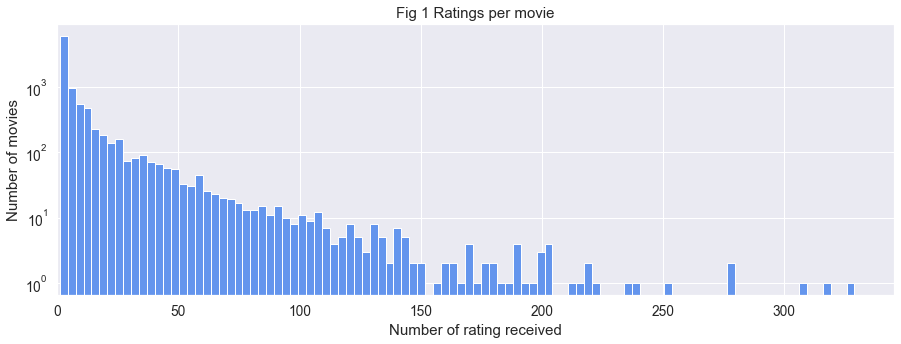

In [17]:
subset = ratings.groupby(by="movieId").size().to_frame('numRating').reset_index()
dftmp = subset.sort_values(by=['numRating'], ascending = False)
plt.figure(figsize=(15,5))
plt.hist(dftmp.numRating, bins=100, color='cornflowerblue', log=True)
plt.title('Fig 1 Ratings per movie')
plt.xlabel('Number of rating received')
plt.ylabel('Number of movies')
plt.xlim(0,)
plt.show()